In [1]:
import os
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import notebook, tqdm
import seaborn as sns
import pandas as pd

In [2]:
root = "/home/ubuntu/suad_23/"
eval_folder = "/home/ubuntu/aicrowd-suadd-2023/semantic_segmentation/evaluation_photos/"
model_names = ["unet/", "u2net/", "u2net_full/", "xunet/"]
imgs = np.array(sorted(os.listdir(os.path.join(root, "inputs")), reverse=True))[[3, 6, 29, 60]]

In [3]:
cmap = sns.color_palette("tab20")
cmap = np.array([tuple([el*255 for el in tup]) for tup in cmap], dtype=np.uint8)
colormap255 = np.zeros((256, 3), dtype=np.uint8)
colormap255[:16] = cmap[:16]
colormap255[254] = cmap[16]

In [4]:
size = (512, 512)
transforms = A.Resize(*size)

In [5]:
vals = []
for i, file_img in tqdm(enumerate(imgs)):
    img = Image.open(root + "/inputs/"+file_img).convert("L")
    img = np.array(img)
    target = Image.open(root + "/semantic_annotations/"+file_img).convert("L")
    target = np.array(target)
    masks = [target]
    for model in model_names:
        segment = Image.open(eval_folder + model+file_img).convert("L")
        segment = np.array(segment)
        masks.append(segment)
    transformed = transforms(image=img, masks=masks)
    img = transformed["image"]
    img_desc = (img, )
    for mask in transformed["masks"]:
        mask = colormap255[mask]
        img_desc = img_desc + (mask,)
    vals.append(img_desc)
    # if i == 3:
    #     break

4it [00:00, 10.29it/s]


In [6]:
labels = ["image", "ground truth", "UNet", "U2Net lite", "U2Net full", "XuNet"]

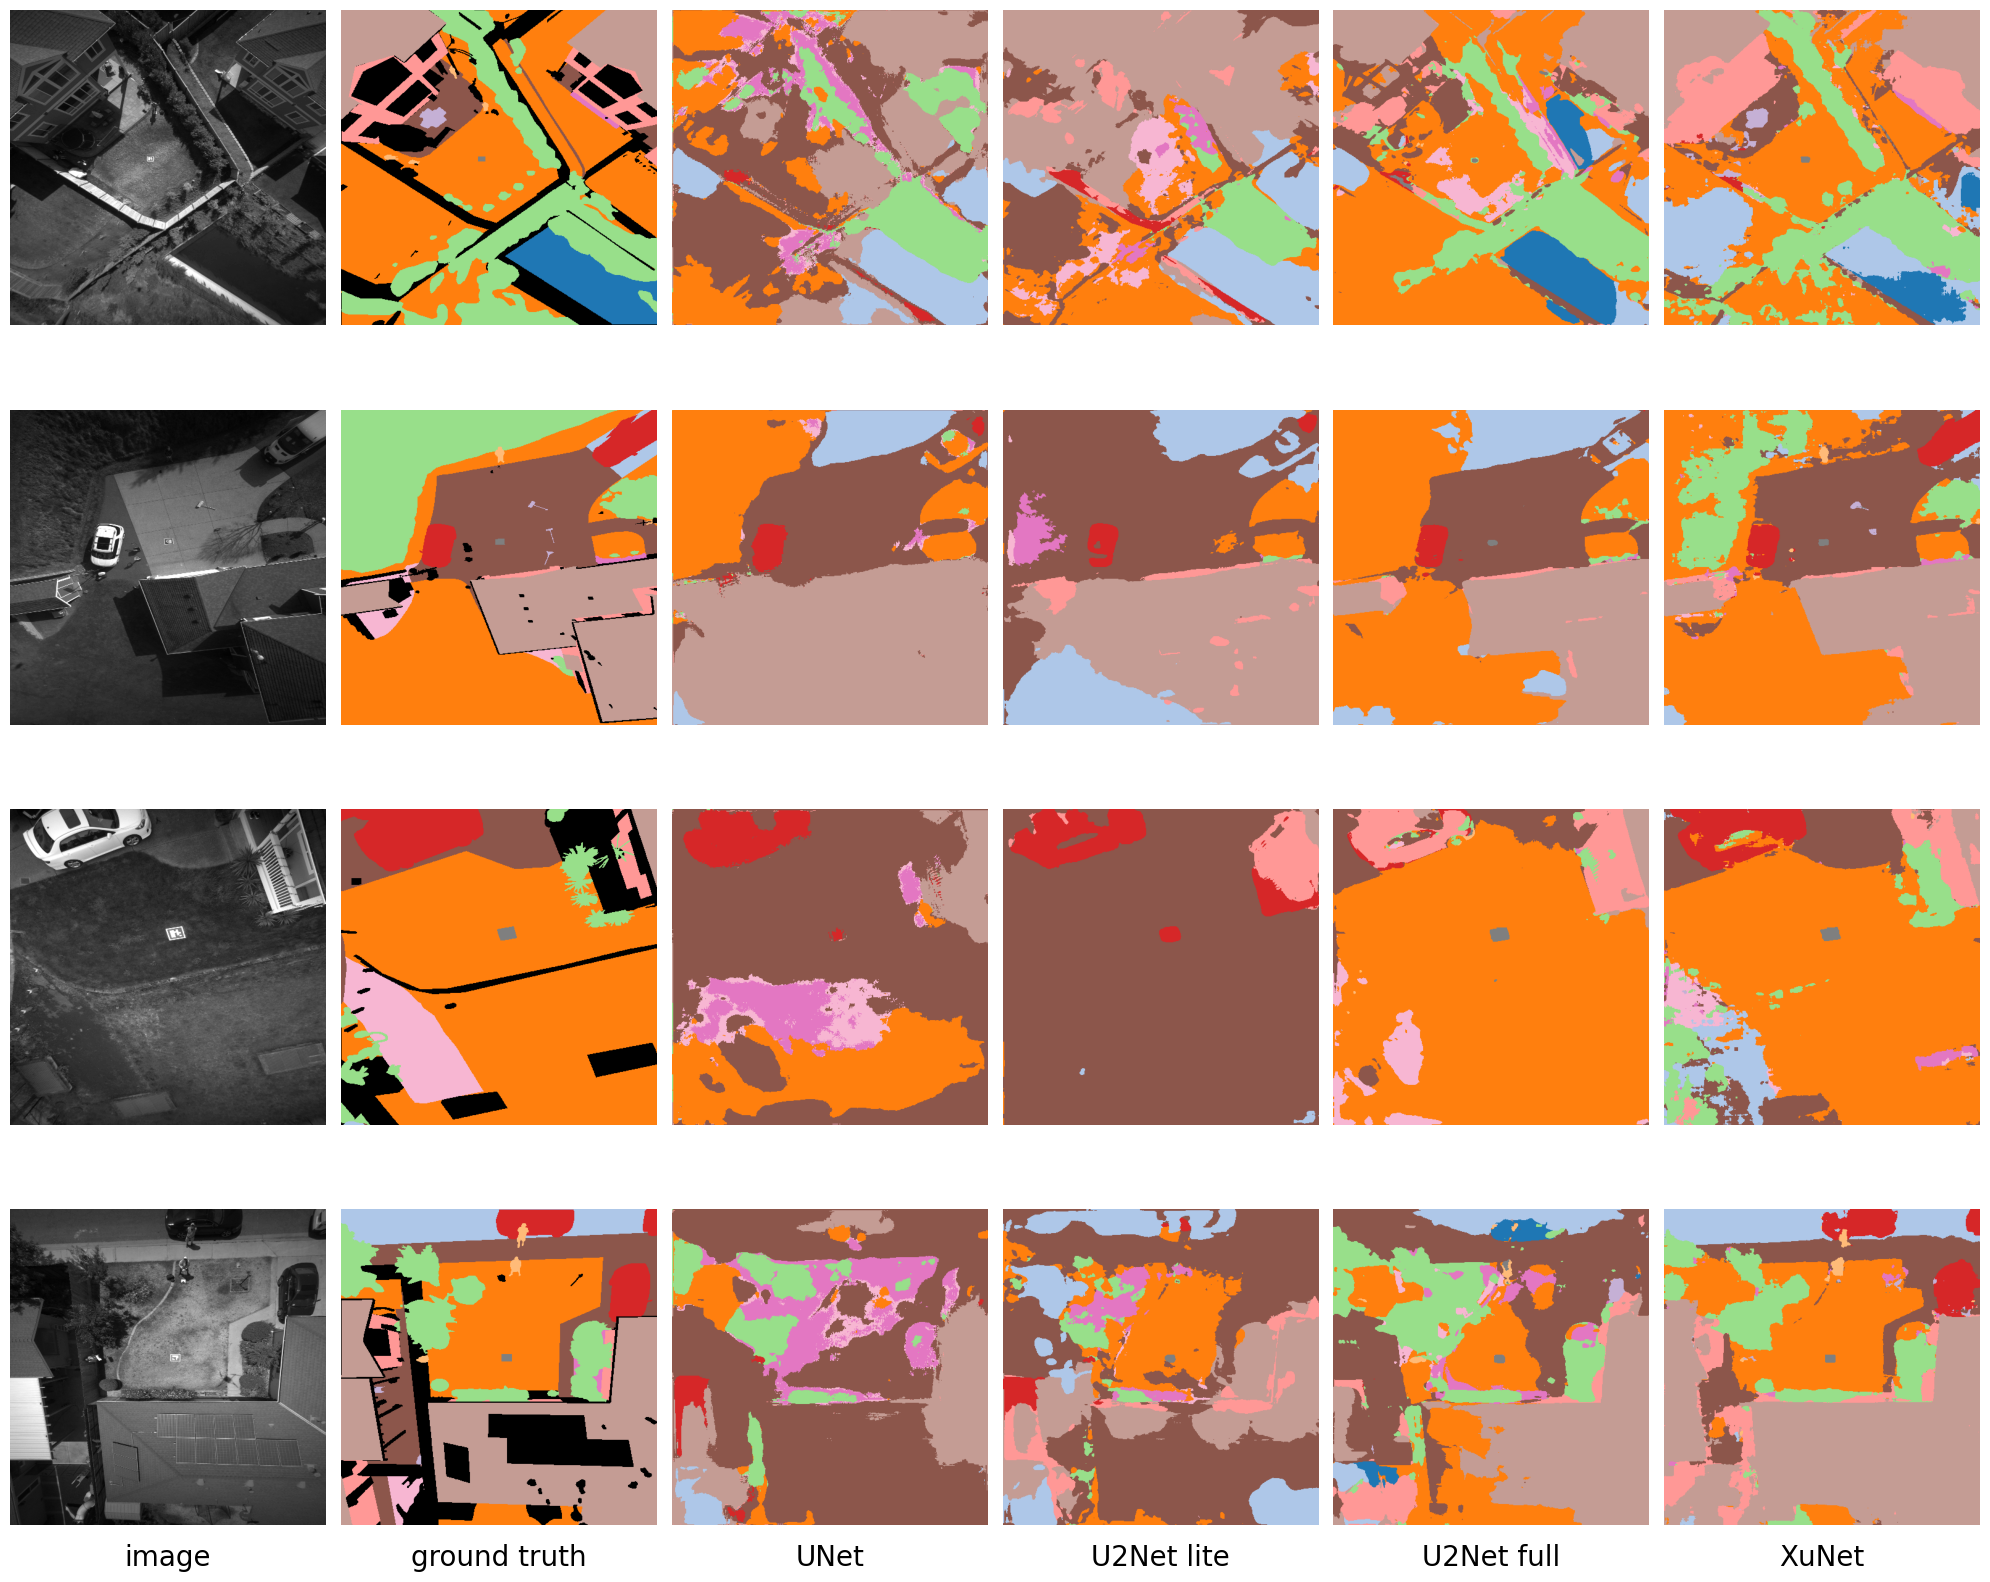

In [7]:
fig=plt.figure(figsize=(20, 19))
axes = []
fig.tight_layout()
for i, res in enumerate(vals):
        axes.append(fig.add_subplot(len(vals), len(res), len(res)*i+1))
        plt.axis('off')
        plt.imshow(res[0], cmap='gray')
        for j in range(1, len(res)):
            axes.append(fig.add_subplot(len(vals), len(res), len(res)*i+1+j))
            plt.axis('off')
            plt.imshow(res[j])
        fig.tight_layout()
fig.tight_layout()
for ax, col in zip(axes, labels):
    ax.annotate(col, xy=(0.5, -3.95), xytext=(0, 5),
                xycoords='axes fraction', textcoords='offset points',
                ha='center', va='baseline', size=20)
plt.show()